In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\vishn\\Downloads\\extracted_data.csv")
df.head()

time    HGT_prl  latitude  longitude    TMP_prl     TMP_2m  \
0  1990-01-01 00:00:00  5851.0586     13.68      80.16  289.79260  298.78370   
1  1990-01-01 06:00:00  5856.1550     13.68      80.16  288.84174  298.66785   
2  1990-01-01 12:00:00  5853.1550     13.68      80.16  289.89853  299.04560   
3  1990-01-01 18:00:00  5848.7900     13.68      80.16  288.81348  298.87085   
4  1990-01-02 00:00:00  5851.9550     13.68      80.16  288.18890  299.14282   

       APCP_sfc  UGRD_10m  VGRD_10m  
0  1.409983e-14 -0.730697  0.115279  
1  2.255973e-13 -3.830207 -1.373627  
2  0.000000e+00 -4.528024 -1.926858  
3  0.000000e+00 -4.498979 -0.072557  
4  6.250000e-02 -2.182430 -1.781631

In [3]:
scaling_factor = 10**3  # Convert meters to millimeters
df['APCP_sfc'] = (df['APCP_sfc'] * scaling_factor).round().astype(int)

# Temperature monthly visualization for shar 

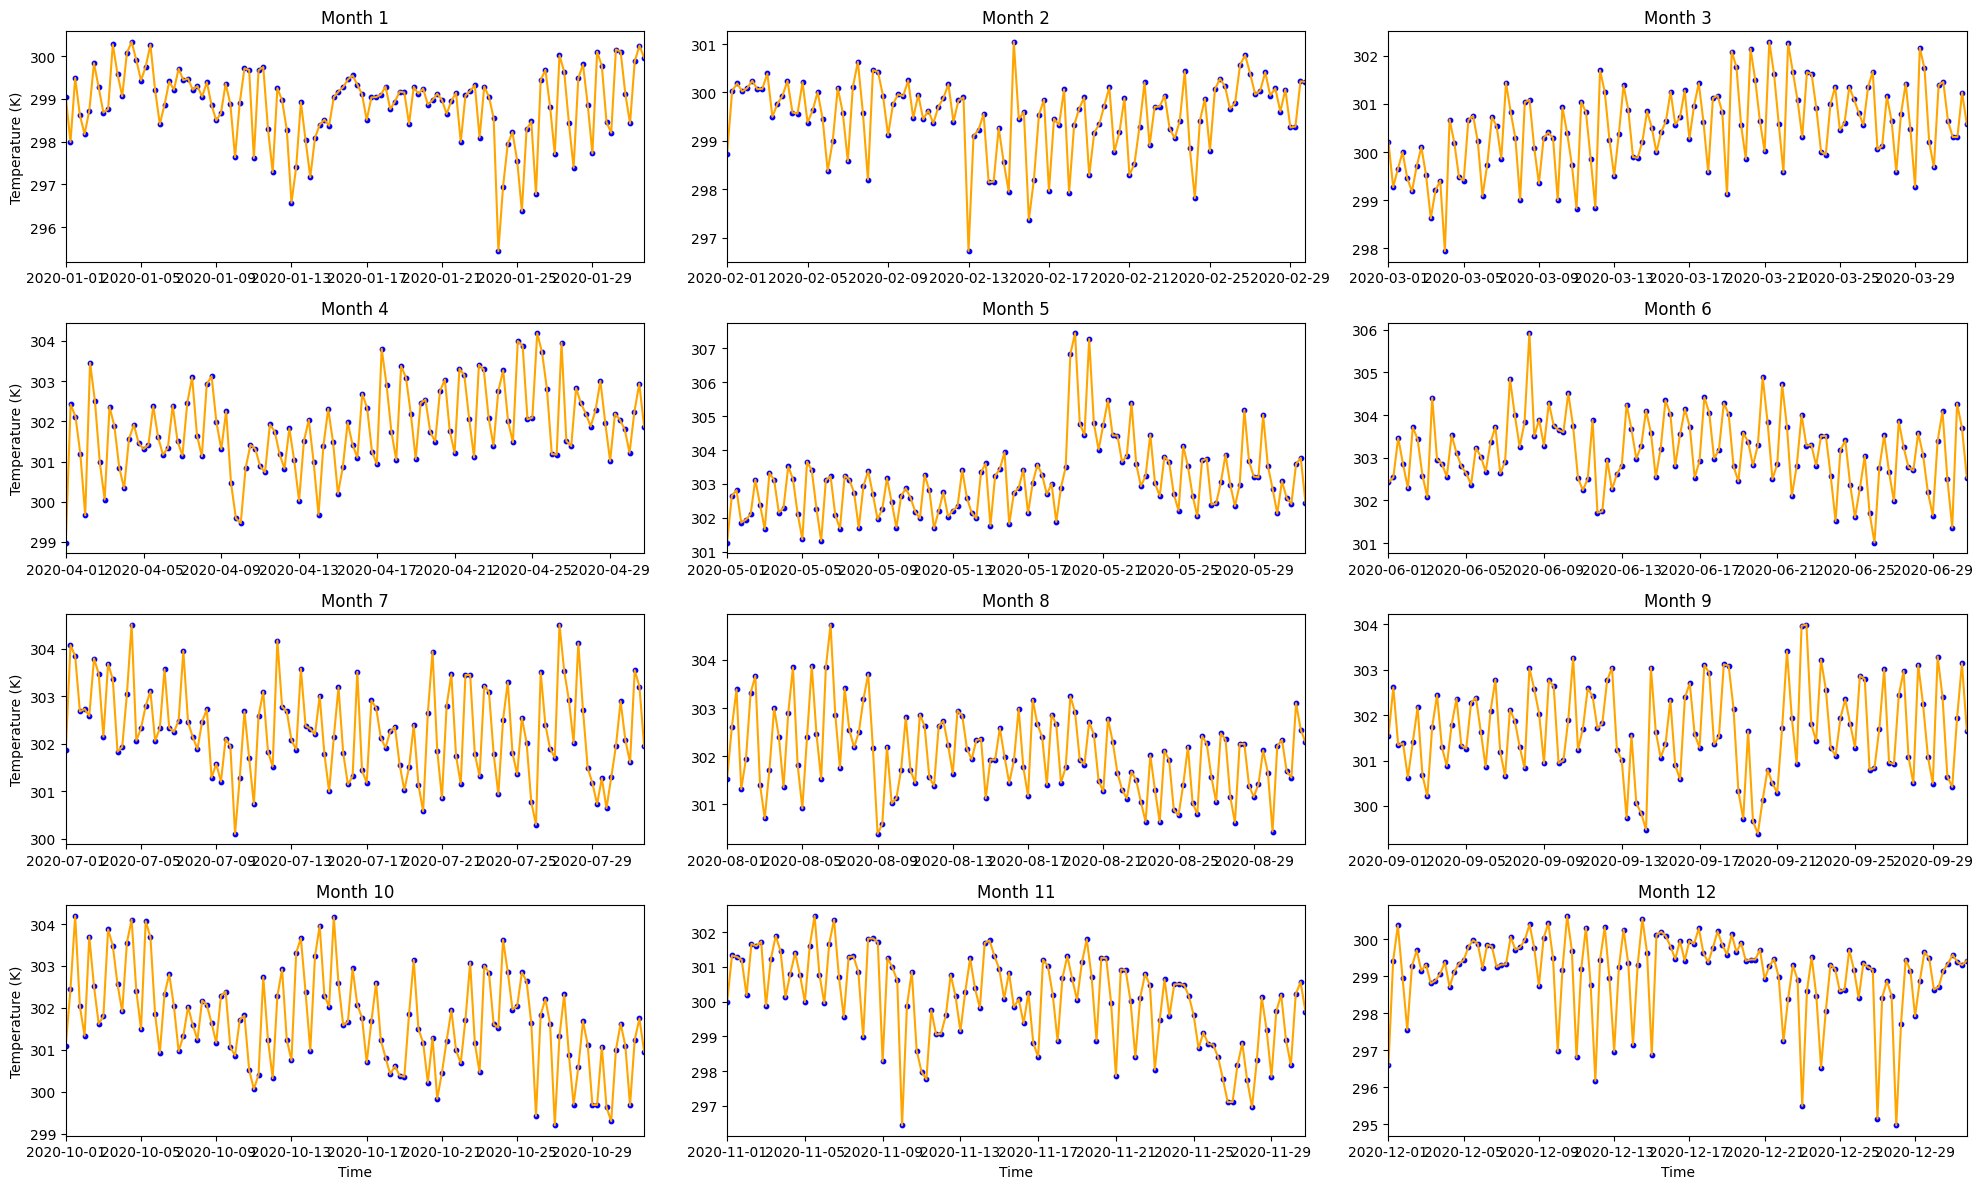

In [18]:
# Define the number of rows and columns for the subplot grid
n_cols = 3  # 3
n_rows = 4  # 4 rows (since we have 12 months)


# Create separate plots for each month with time steps marked as points in a subplot layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 12))

# Flatten the axes array for easier indexing
axs = axs.ravel()

# Loop over the months and create subplots
for i, month in enumerate(unique_months_2020):
    # Filter data for the specific month
    data_month = data_2020[data_2020['time'].dt.month == month]
    
    # Plot the temperature values for all time steps in the month (line plot)
    axs[i].plot(data_month['time'], data_month['TMP_2m'], label=f'Month {month}', color='orange', linestyle='-')
    
    # Add scatter plot to mark the time steps as points
    axs[i].scatter(data_month['time'], data_month['TMP_2m'], color='blue', s=10)
    
    # Set title for each subplot
    axs[i].set_title(f'Month {month}')
    
    # Set x-axis limits to cover only the current month
    axs[i].set_xlim([data_month['time'].min(), data_month['time'].max()])
    
    # Set labels only for the edge plots
    if i % n_cols == 0:
        axs[i].set_ylabel('Temperature (K)')
    if i >= (n_cols * (n_rows - 1)):
        axs[i].set_xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the entire grid of subplots
plt.show()


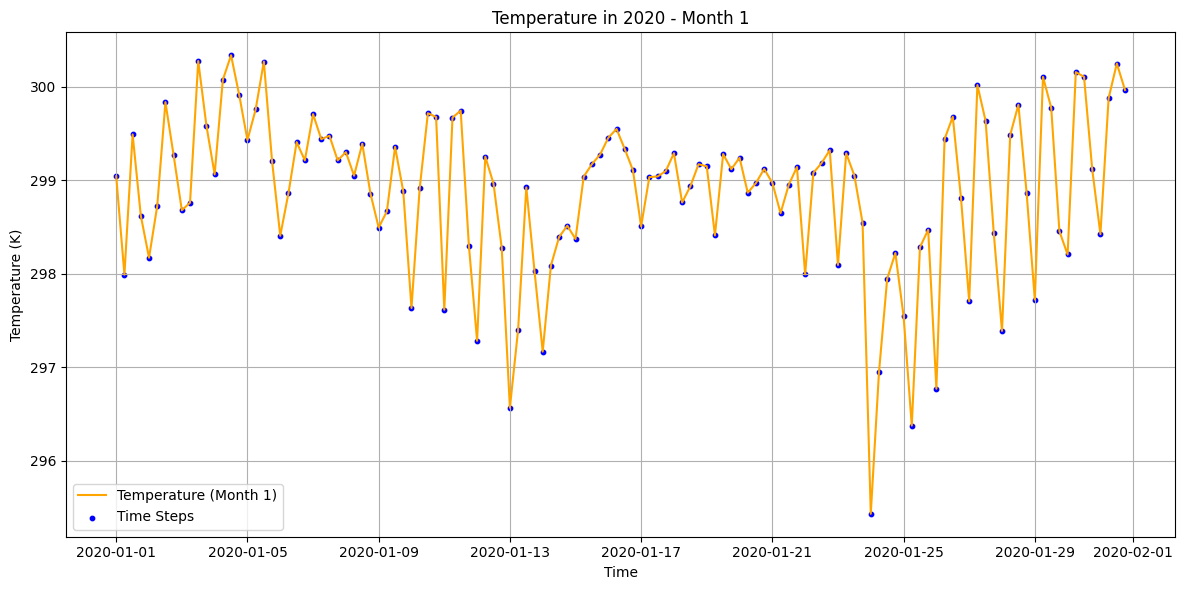

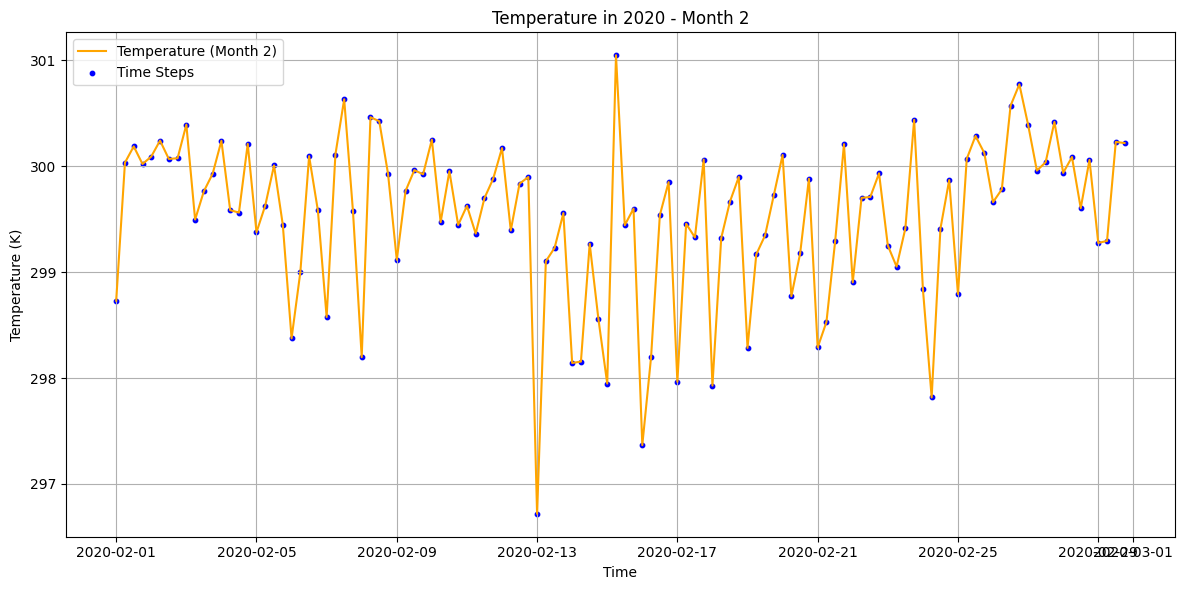

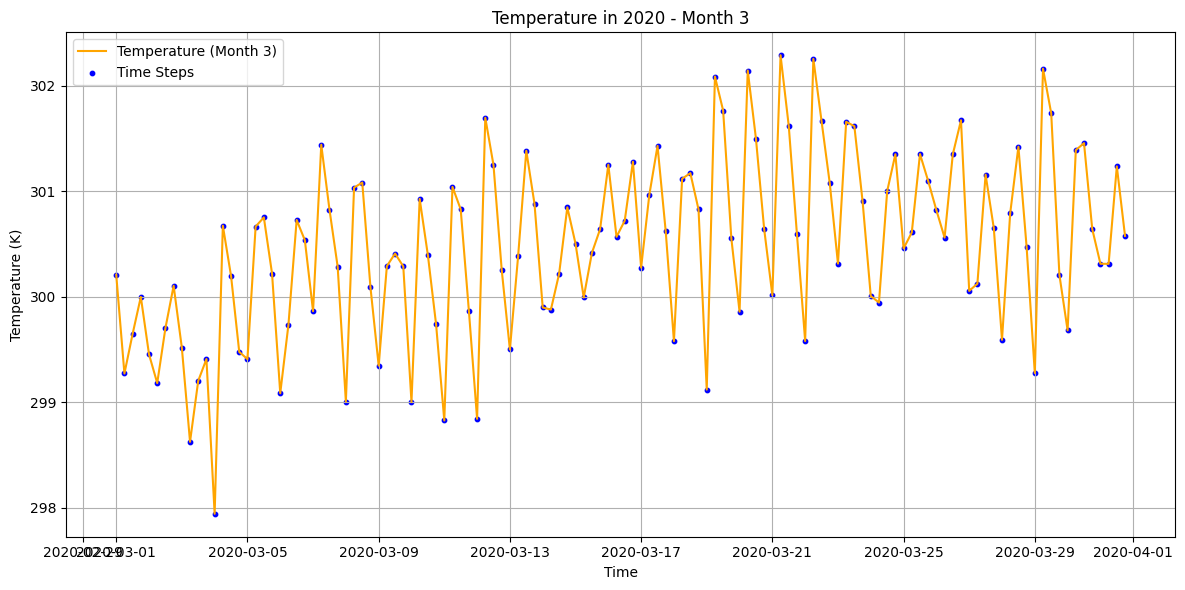

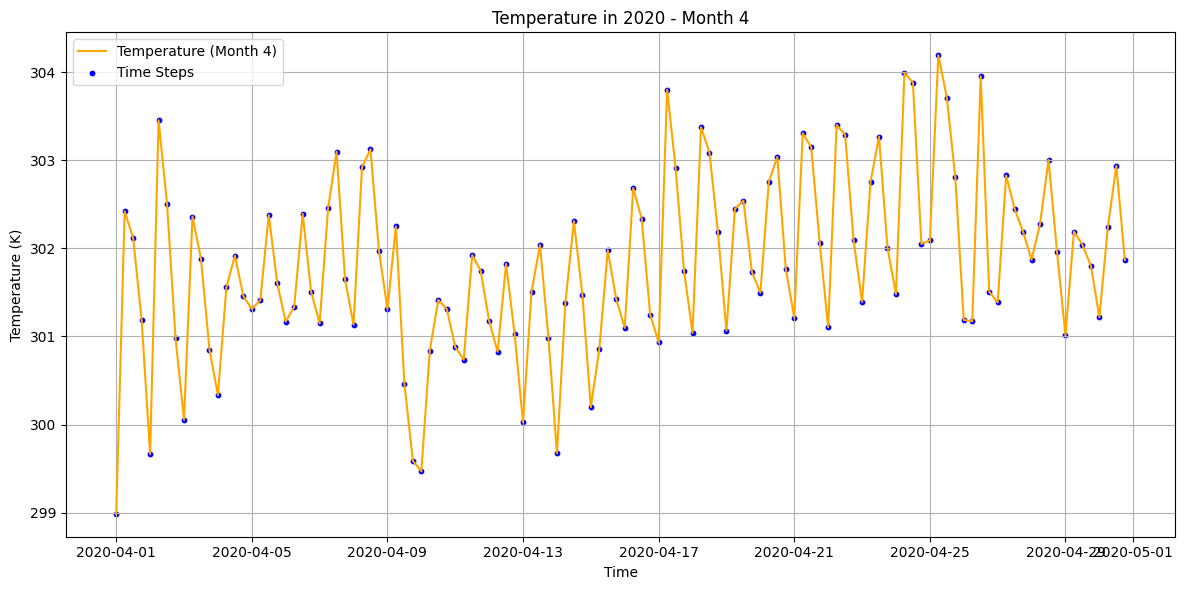

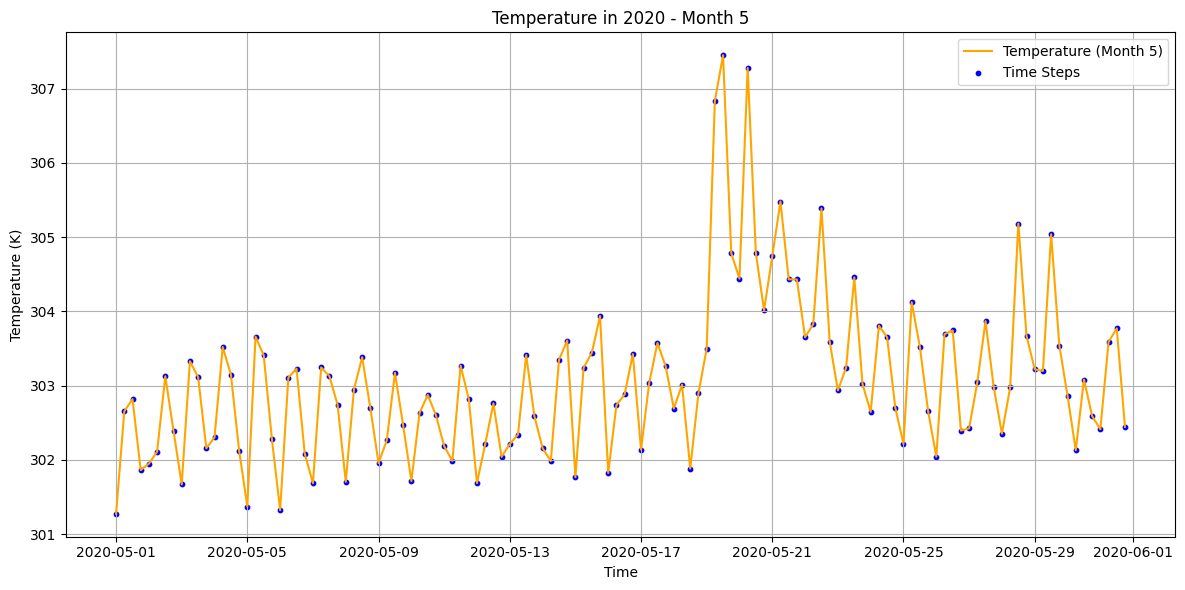

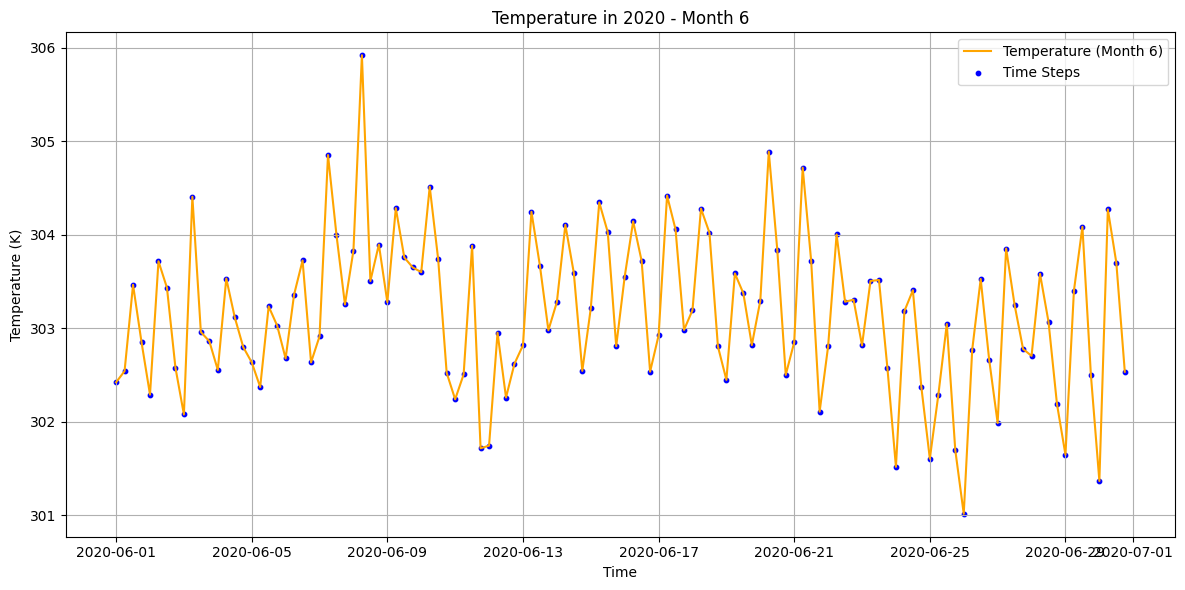

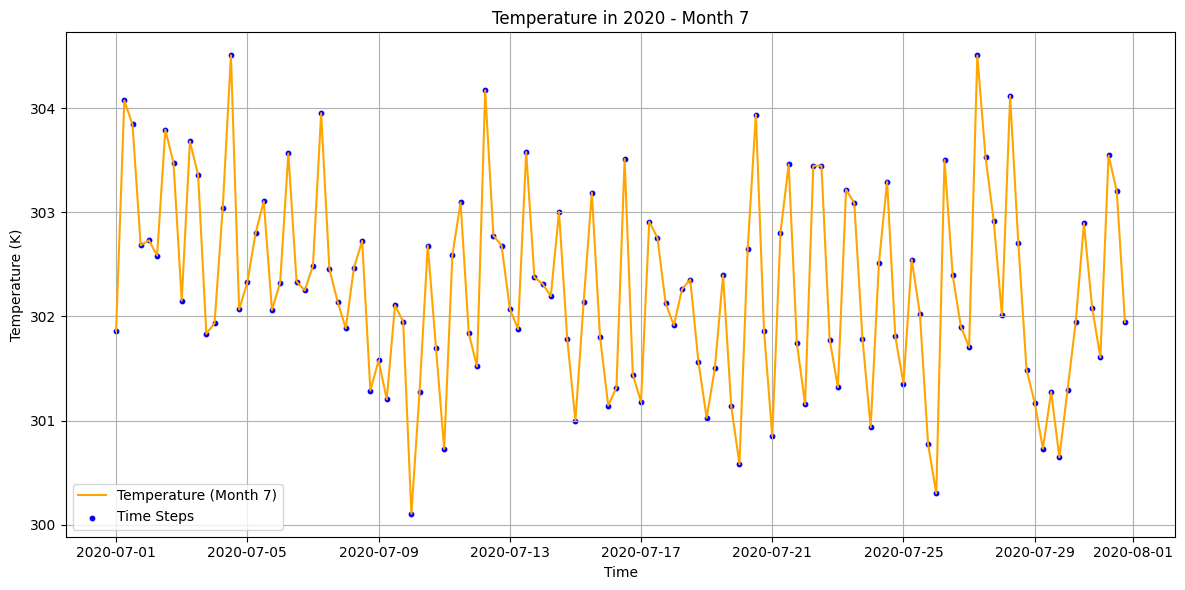

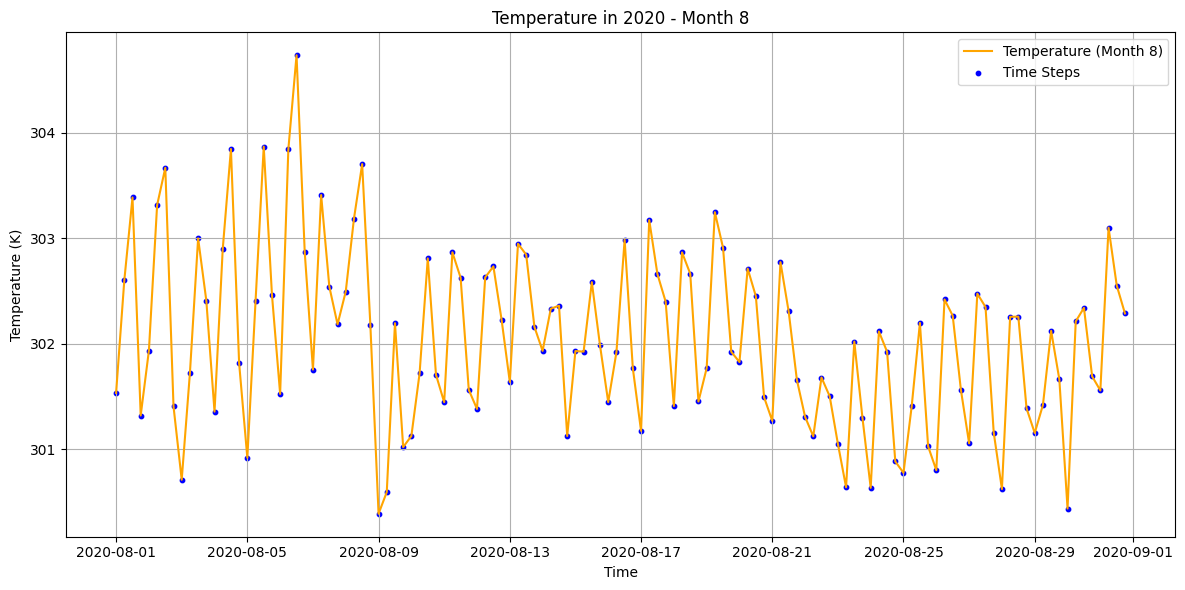

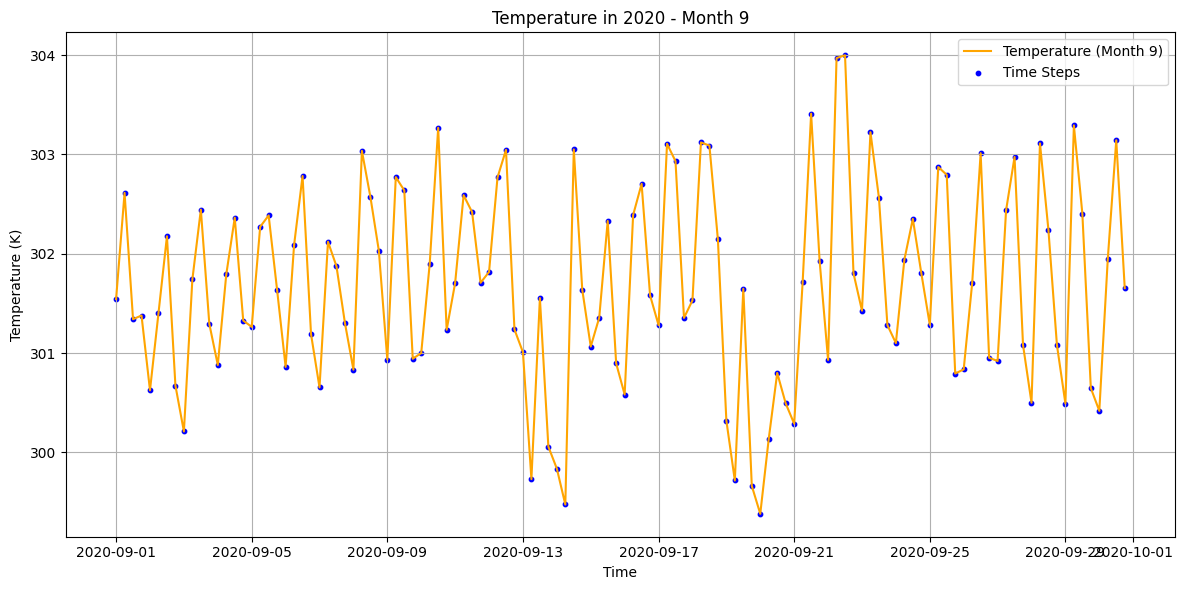

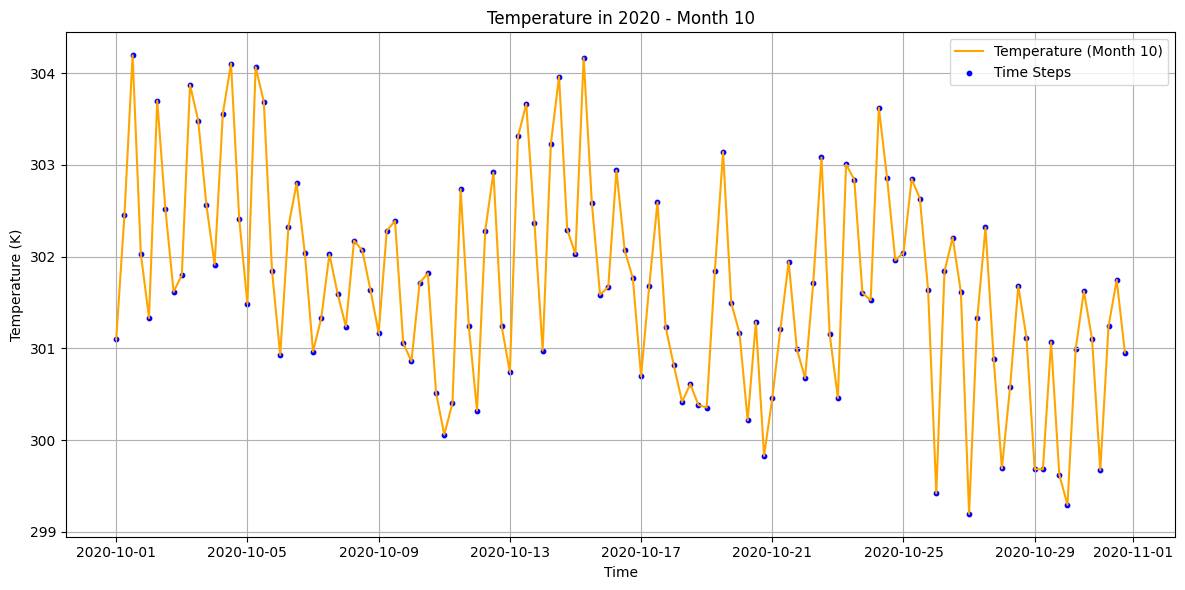

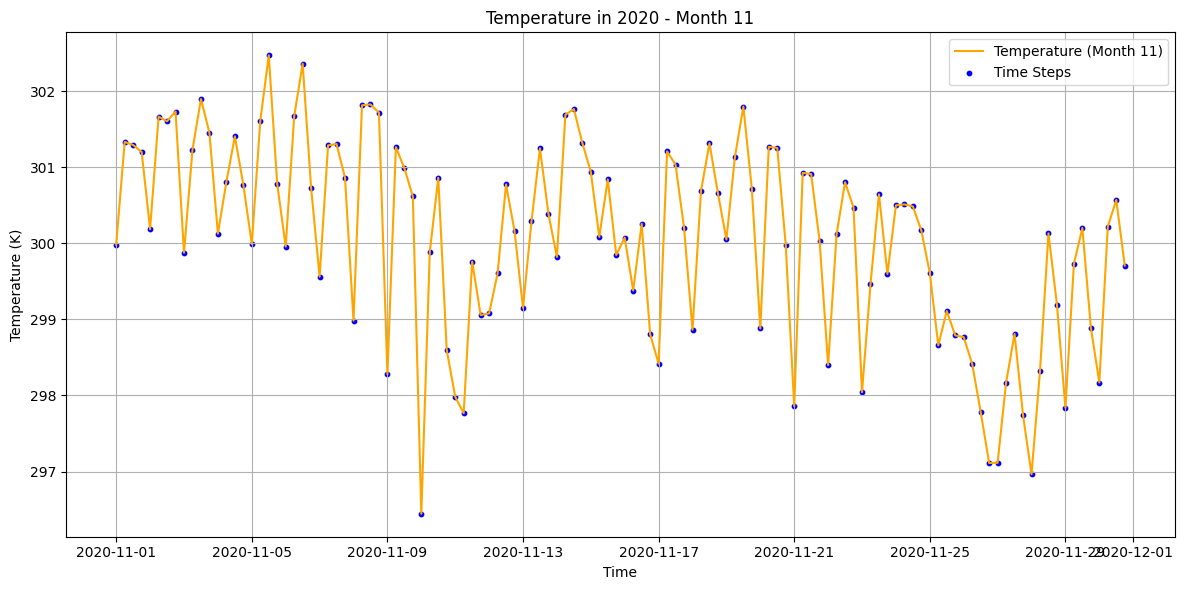

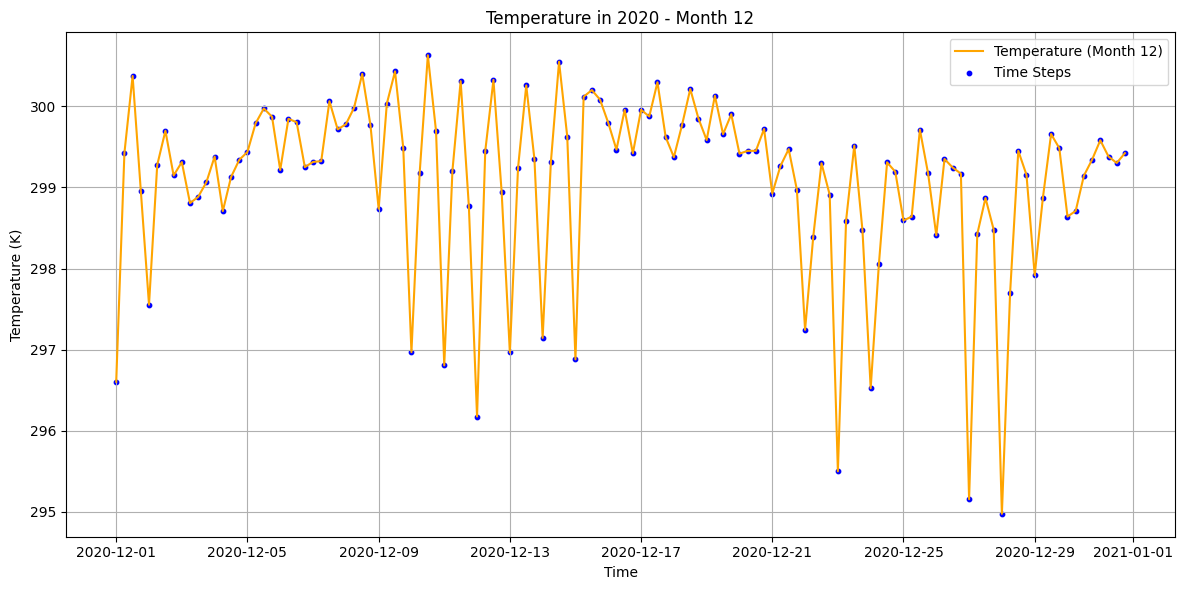

In [10]:
# Create separate plots for each month with time steps marked as points
for month in unique_months_2020:
    # Filter data for the specific month
    data_month = data_2020[data_2020['time'].dt.month == month]
    
    # Create a figure for each month
    plt.figure(figsize=(12, 6))
    
    # Plot the temperature values for all time steps in the month (line plot)
    plt.plot(data_month['time'], data_month['TMP_2m'], label=f'Temperature (Month {month})', color='orange', linestyle='-')
    
    # Add scatter plot to mark the time steps as points
    plt.scatter(data_month['time'], data_month['TMP_2m'], color='blue', label='Time Steps', s=10)
    
    # Set labels and title
    plt.ylabel('Temperature (K)')
    plt.xlabel('Time')
    plt.title(f'Temperature in 2020 - Month {month}')
    
    # Add legend
    plt.legend()
    
    # Show the plot with grid
    plt.tight_layout()
    plt.grid(True)
    plt.show()


# wind - U monthly visualization for shar data 

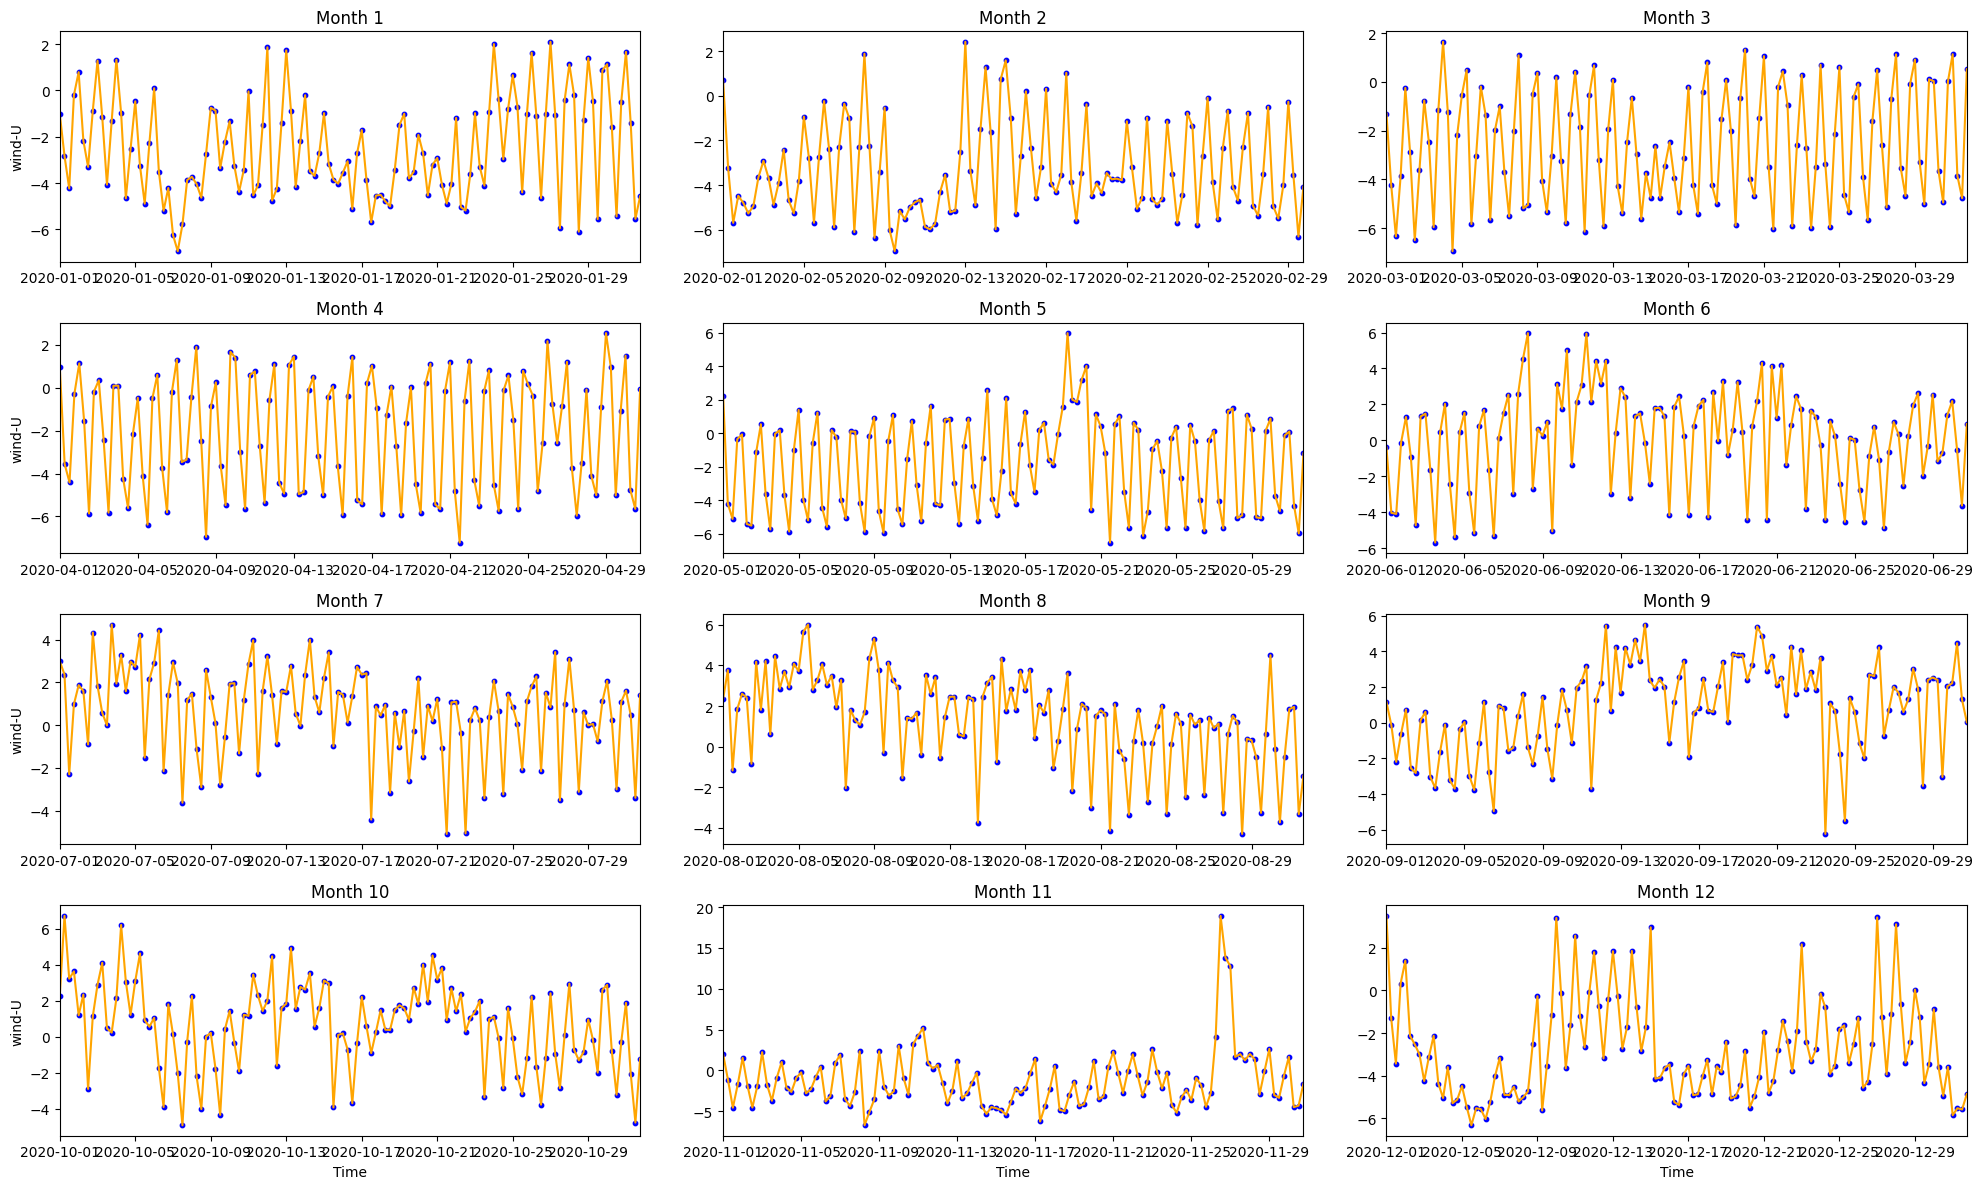

In [19]:
# Define the number of rows and columns for the subplot grid
n_cols = 3  # 3
n_rows = 4  # 4 rows (since we have 12 months)


# Create separate plots for each month with time steps marked as points in a subplot layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 12))

# Flatten the axes array for easier indexing
axs = axs.ravel()

# Loop over the months and create subplots
for i, month in enumerate(unique_months_2020):
    # Filter data for the specific month
    data_month = data_2020[data_2020['time'].dt.month == month]
    
    # Plot the temperature values for all time steps in the month (line plot)
    axs[i].plot(data_month['time'], data_month['UGRD_10m'], label=f'Month {month}', color='orange', linestyle='-')
    
    # Add scatter plot to mark the time steps as points
    axs[i].scatter(data_month['time'], data_month['UGRD_10m'], color='blue', s=10)
    
    # Set title for each subplot
    axs[i].set_title(f'Month {month}')
    
    # Set x-axis limits to cover only the current month
    axs[i].set_xlim([data_month['time'].min(), data_month['time'].max()])
    
    # Set labels only for the edge plots
    if i % n_cols == 0:
        axs[i].set_ylabel('wind-U')
    if i >= (n_cols * (n_rows - 1)):
        axs[i].set_xlabel('Time')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the entire grid of subplots
plt.show()


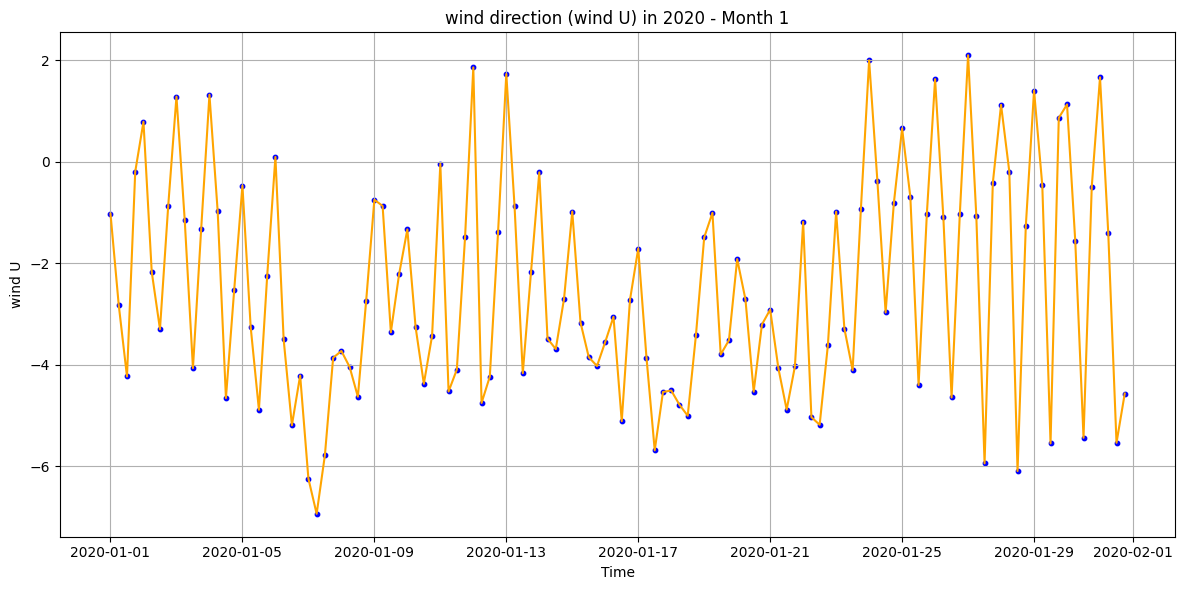

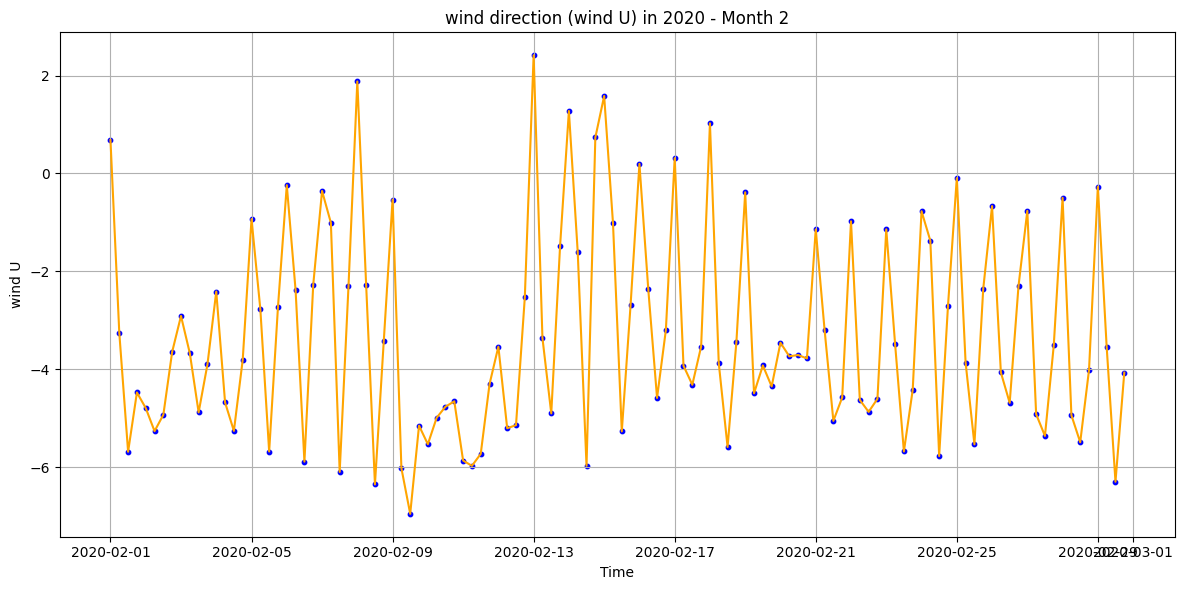

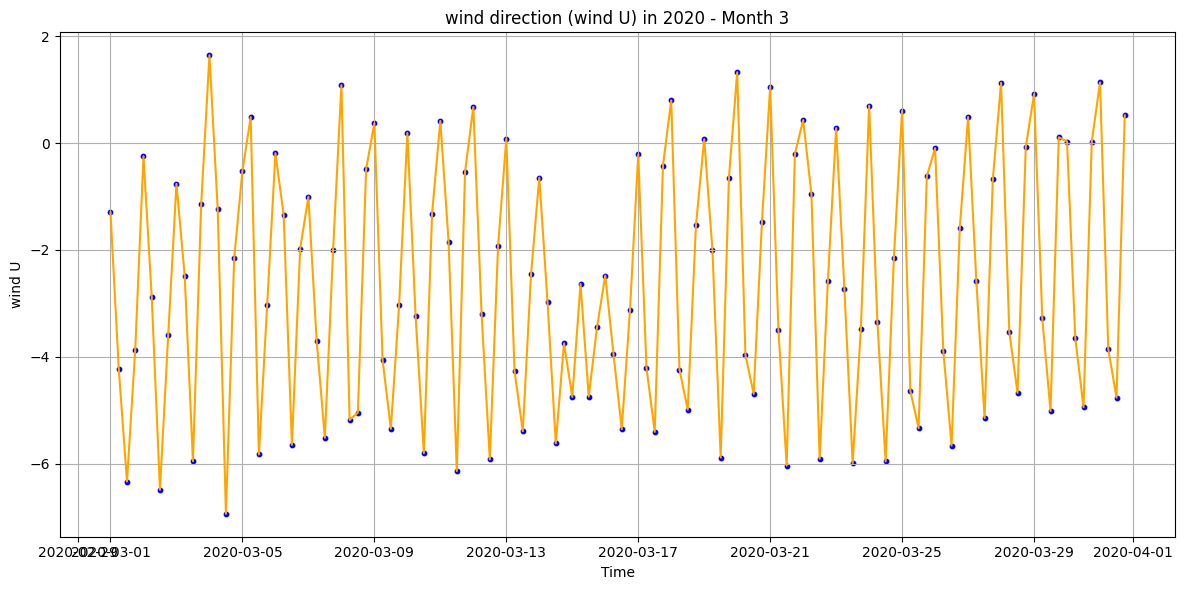

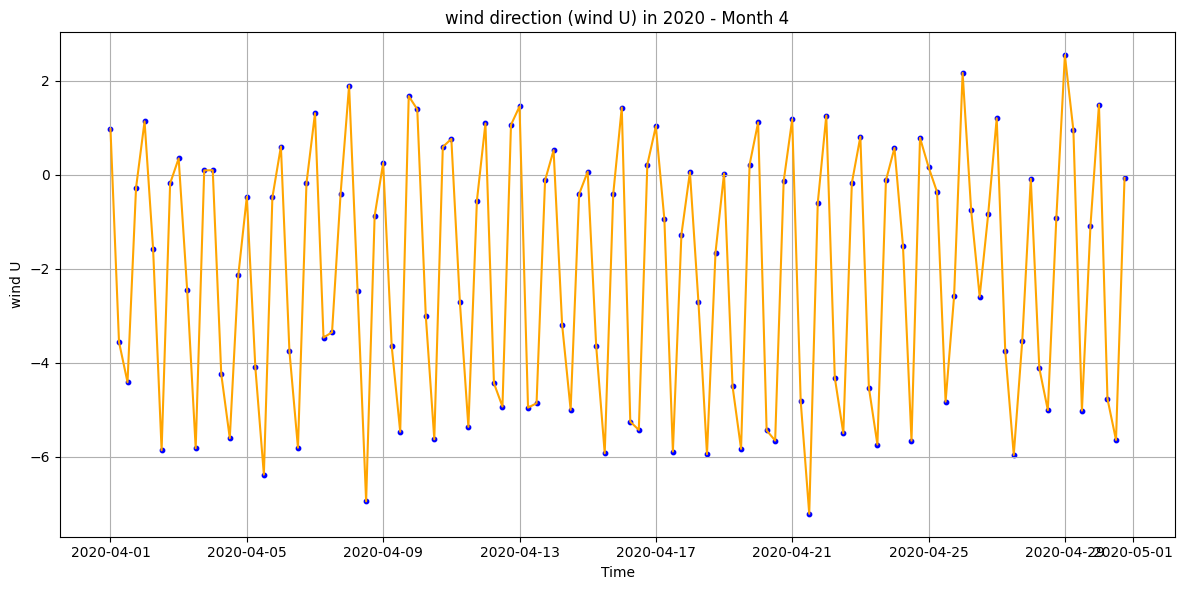

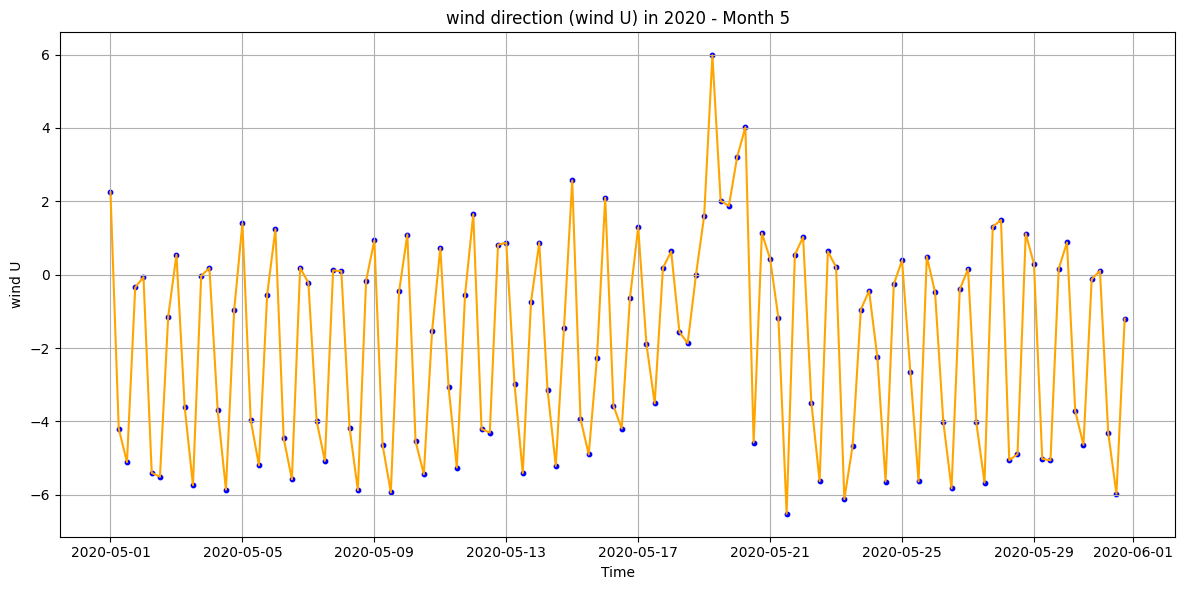

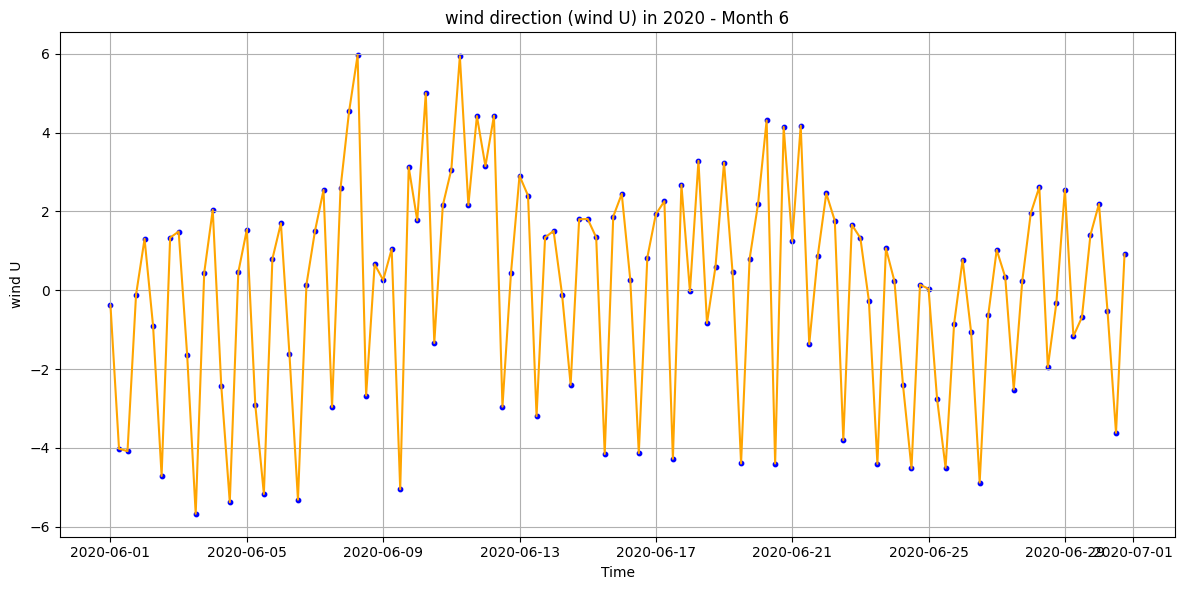

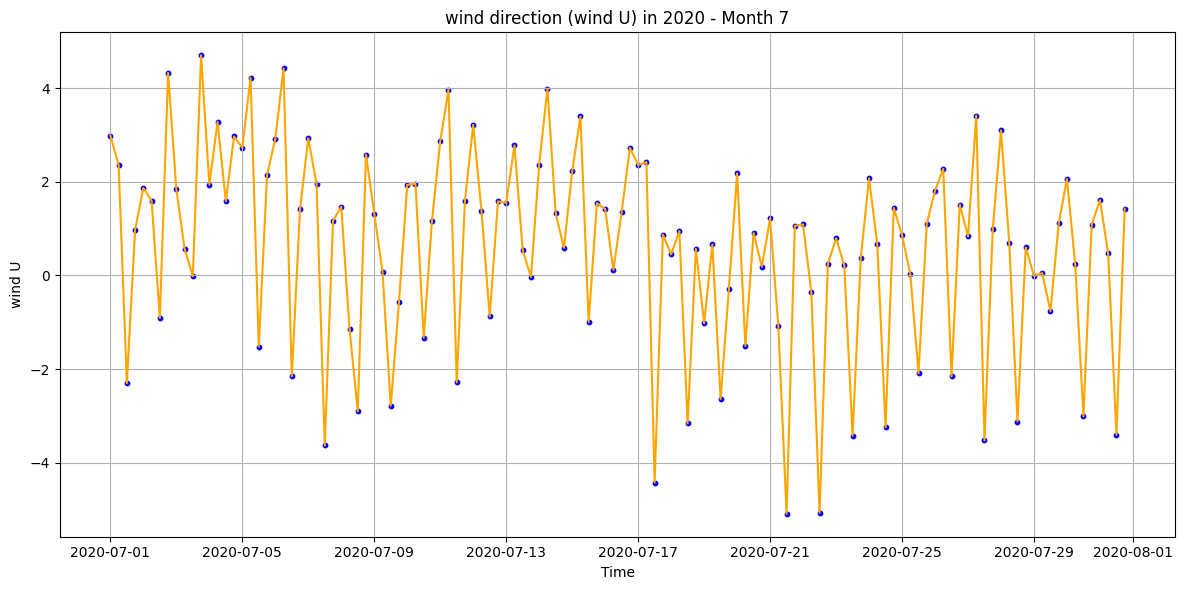

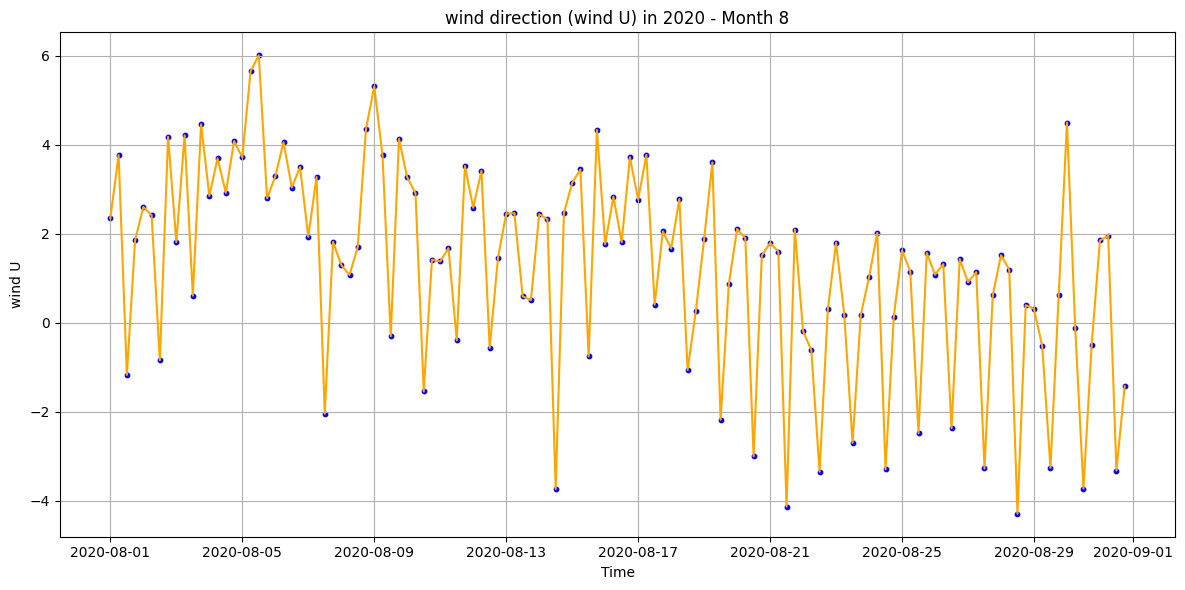

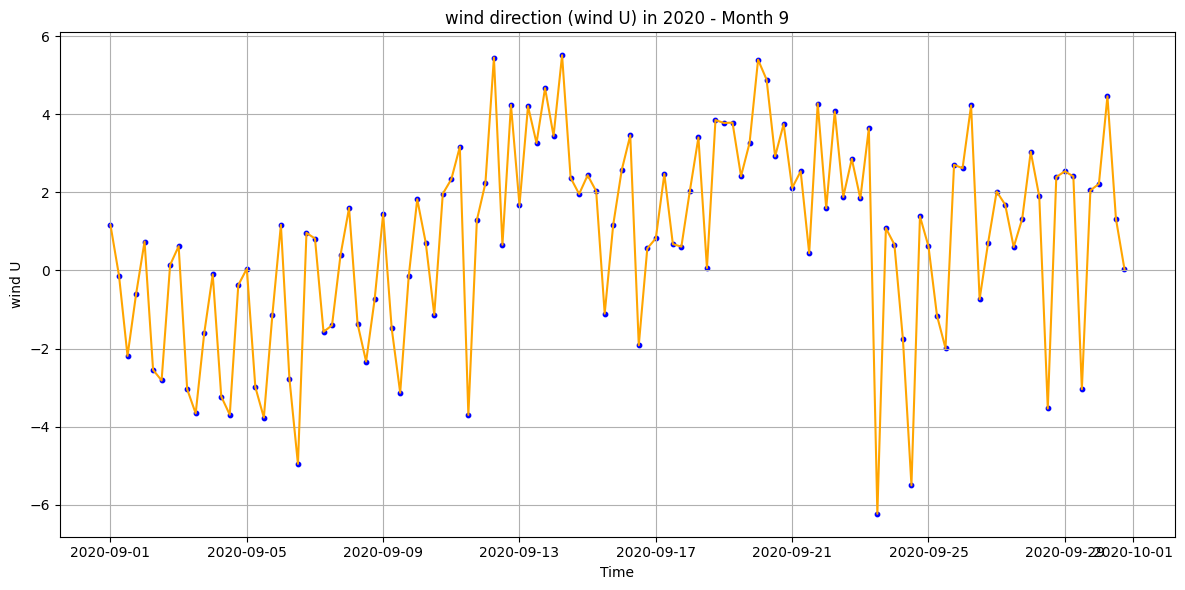

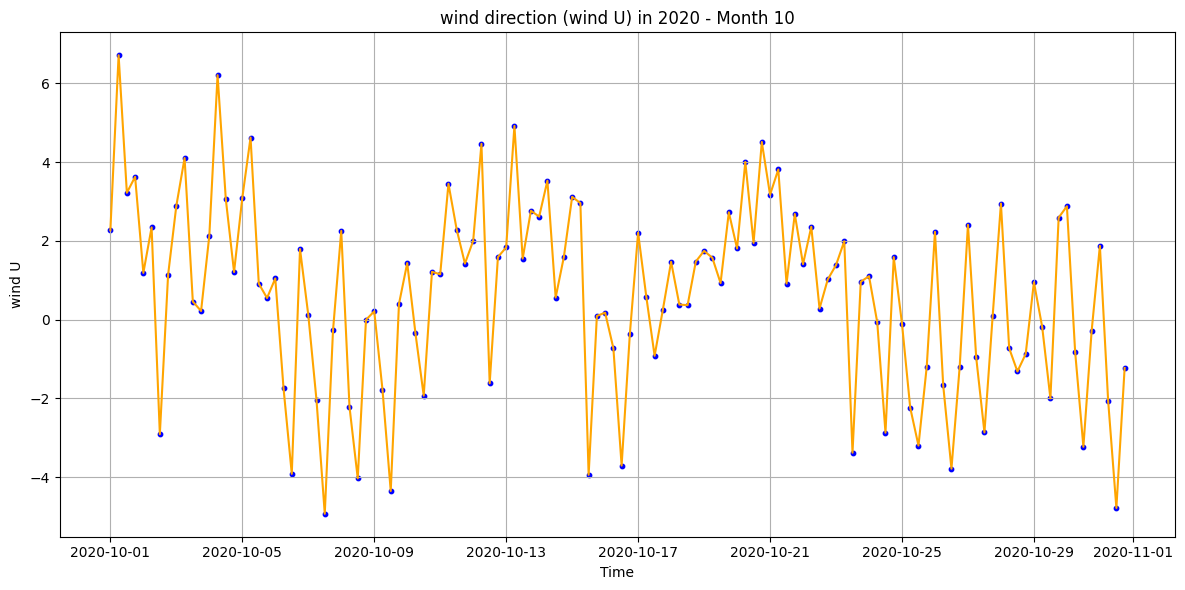

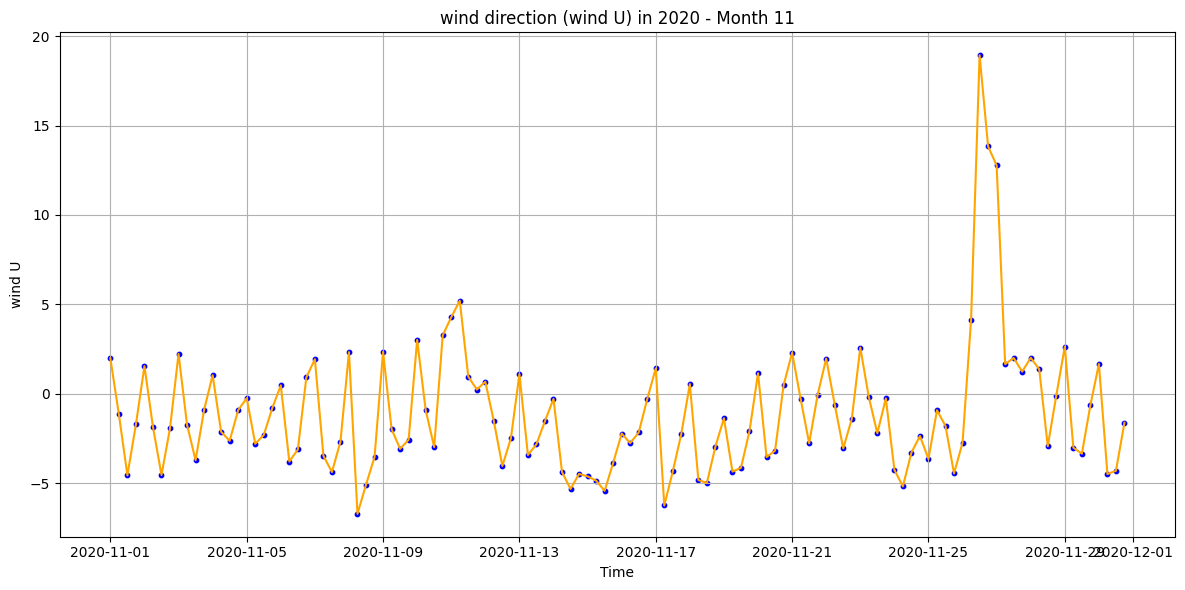

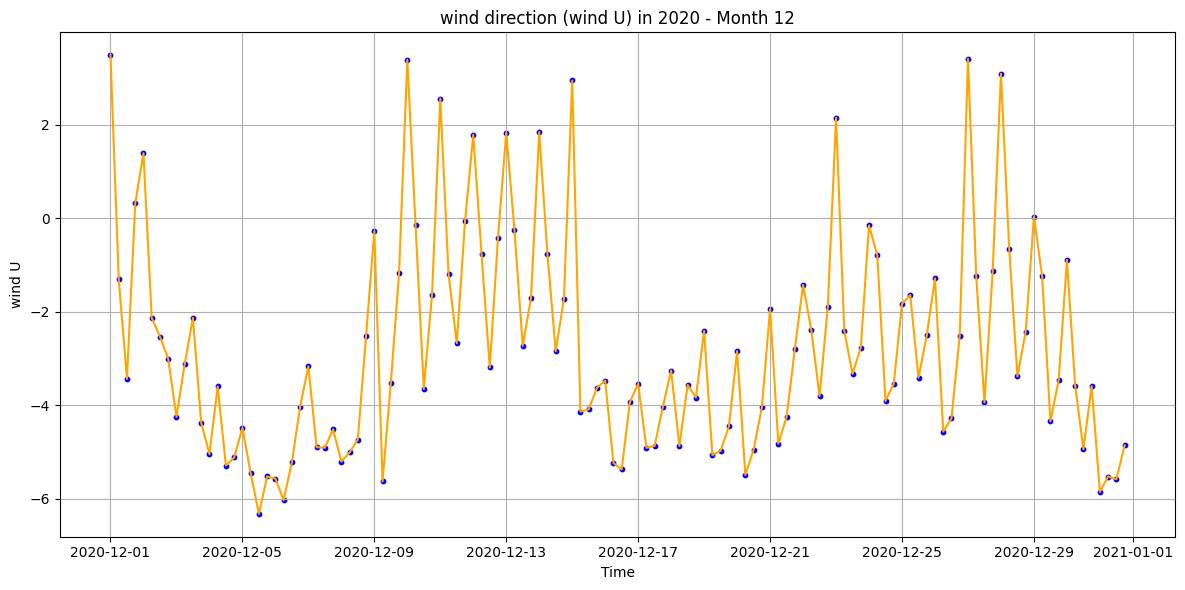

In [15]:
# Create separate plots for each month with time steps marked as points
for month in unique_months_2020:
    # Filter data for the specific month
    data_month = data_2020[data_2020['time'].dt.month == month]
    
    # Create a figure for each month
    plt.figure(figsize=(12, 6))
    
    # Plot the temperature values for all time steps in the month (line plot)
    plt.plot(data_month['time'], data_month['UGRD_10m'], label=f'Temperature (Month {month})', color='orange', linestyle='-')
    
    # Add scatter plot to mark the time steps as points
    plt.scatter(data_month['time'], data_month['UGRD_10m'], color='blue', label='Time Steps', s=10)
    
    # Set labels and title
    plt.ylabel('wind U')
    plt.xlabel('Time')
    plt.title(f'wind direction (wind U) in 2020 - Month {month}')
    
    
    
    # Show the plot with grid
    plt.tight_layout()
    plt.grid(True)
    plt.show()


In [16]:
def compute_rmse(prediction, actual,  mean_dims = ('time')):
  error = prediction - actual
  rmse = np.sqrt(((error)**2 ).mean(mean_dims))
  return rmse
def compute_mae(prediction, actual, mean_dims = ('time')):
    error = prediction - actual
    mae = np.abs(error).mean(mean_dims)
    return mae
def compute_acc(prediction, actual):
    clim = actual.mean('time')
    try:
        t = np.intersect1d(prediction.time, actual.time)
        pred_anomaly = prediction.sel(time=t) - clim
    except AttributeError:
        t = actual.time.values
        pred_anomaly = prediction - clim
    act_anomaly = actual.sel(time=t) - clim

    pred_norm = pred_anomaly - pred_anomaly.mean()
    act_norm = act_anomaly - act_anomaly.mean()

    acc = (
            np.sum(pred_norm * act_norm) /
            np.sqrt(
                np.sum(pred_norm ** 2) * np.sum(act_norm ** 2)
            )
    )
    return acc
def compute_r_square(prediction, actual, mean_dims=('time')):
    # Calculate the mean of the actual values along the specified dimensions
    actual_mean = actual.mean(mean_dims)

    # Calculate the total sum of squares (SS_tot)
    ss_tot = ((actual - actual_mean) ** 2).sum(mean_dims)

    # Calculate the residual sum of squares (SS_res)
    ss_res = ((prediction - actual) ** 2).sum(mean_dims)

    # Calculate R-squared
    r_square = 1 - (ss_res / ss_tot)

    return r_square

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Filter the data by year (assuming 'time' column exists)
train_data = df[(df['time'] >= '1990') & (df['time'] < '2017')].drop(columns=['time'])
valid_data = df[(df['time'] >= '2017') & (df['time'] < '2019')].drop(columns=['time'])
test_data = df[(df['time'] >= '2019') & (df['time'] <= '2020')].drop(columns=['time'])

# Define features and target variables
#features = ['HGT_prl', 'TMP_2m', 'APCP_sfc', 'UGRD_10m', 'VGRD_10m']  # Example feature columns
features = ['VGRD_10m'] 
target = 'VGRD_10m'  # Example target column

# Split features and target variable
train_features = train_data[features]
train_target = train_data[target]
valid_features = valid_data[features]
valid_target = valid_data[target]
test_features = test_data[features]
test_target = test_data[target]

# Normalize the features using the mean and standard deviation of the training data
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
valid_features_scaled = scaler.transform(valid_features)
test_features_scaled = scaler.transform(test_features)

# Function to create windowed data
def create_windowed_data(features_data, target_data, past_steps, future_steps):
    X, y = [], []
    for i in range(len(features_data) - past_steps - future_steps + 1):
        X.append(features_data[i:i + past_steps])
        y.append(target_data[i + past_steps:i + past_steps + future_steps])
    return np.array(X), np.array(y)

# Parameters
past_steps = 16
future_steps = 8

# Create windowed data for each dataset
X_train, y_train = create_windowed_data(train_features_scaled, train_target.values, past_steps, future_steps)
X_valid, y_valid = create_windowed_data(valid_features_scaled, valid_target.values, past_steps, future_steps)
X_test, y_test = create_windowed_data(test_features_scaled, test_target.values, past_steps, future_steps)

# Now X_train, y_train, X_valid, y_valid, X_test, y_test are ready for model training and evaluation
print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation data shape: X_valid={X_valid.shape}, y_valid={y_valid.shape}")
print(f"Test data shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training data shape: X_train=(39425, 16, 1), y_train=(39425, 8)
Validation data shape: X_valid=(2897, 16, 1), y_valid=(2897, 8)
Test data shape: X_test=(1437, 16, 1), y_test=(1437, 8)


In [18]:
import tensorflow.keras as keras
from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, GRU, LSTMCell
from keras.layers import Conv2D, MaxPooling2D, Flatten, Bidirectional, LSTM, Dense, TimeDistributed, Conv1D, MaxPooling1D, Dropout, Conv3D
import warnings
warnings.filterwarnings('ignore')

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the number of features
num_features = X_train.shape[2]  # Number of features in your data

# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(past_steps, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# Adjust the output layer to match the shape of y_train
model.add(Dense(future_steps)) # Output a single value for each time step

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

# Make predictions
y_pred = model.predict(X_test)

# Reshape predictions to match y_test shape if necessary
# y_pred = y_pred.reshape(y_test.shape)

# Calculate R-squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test.flatten(), y_pred.flatten())

print(f'R-squared: {r2}')

# Print model summary
model.summary()

Epoch 1/20
1233/1233 [==============================] - 7s 5ms/step - loss: 5.8207 - val_loss: 4.4747
Epoch 2/20
1233/1233 [==============================] - 6s 5ms/step - loss: 5.4947 - val_loss: 4.6753
Epoch 3/20
1233/1233 [==============================] - 6s 5ms/step - loss: 5.4070 - val_loss: 4.4478
Epoch 4/20
1233/1233 [==============================] - 5s 4ms/step - loss: 5.3464 - val_loss: 4.5458
Epoch 5/20
1233/1233 [==============================] - 5s 4ms/step - loss: 5.3098 - val_loss: 4.4073
Epoch 6/20
1233/1233 [==============================] - 6s 4ms/step - loss: 5.1746 - val_loss: 4.5978
Epoch 7/20
1233/1233 [==============================] - 6s 4ms/step - loss: 4.7774 - val_loss: 3.8228
Epoch 8/20
1233/1233 [==============================] - 6s 5ms/step - loss: 4.3847 - val_loss: 3.6349
Epoch 9/20
1233/1233 [==============================] - 5s 4ms/step - loss: 4.2098 - val_loss: 3.7000
Epoch 10/20
1233/1233 [==============================] - 6s 5ms/step - loss: 4.105

In [20]:
import numpy as np
from sklearn.metrics import r2_score

def compute_rmse(prediction, actual):
    error = prediction - actual
    rmse = np.sqrt((error**2).mean())
    return rmse

def compute_mae(prediction, actual):
    error = prediction - actual
    mae = np.abs(error).mean()
    return mae

def compute_acc(prediction, actual):
    # Calculate climatology (mean of actual values)
    clim = actual.mean(axis=0)

    # Calculate anomalies (difference from the climatology)
    pred_anomaly = prediction - clim
    act_anomaly = actual - clim

    # Normalize the anomalies
    pred_norm = pred_anomaly - pred_anomaly.mean(axis=0)
    act_norm = act_anomaly - act_anomaly.mean(axis=0)

    # Calculate the Anomaly Correlation Coefficient (ACC)
    acc = (
        np.sum(pred_norm * act_norm) /
        np.sqrt(np.sum(pred_norm**2) * np.sum(act_norm**2))
    )
    return acc

def compute_r_square(prediction, actual):
    # Calculate R-squared using sklearn's r2_score
    r_square = r2_score(actual.flatten(), prediction.flatten())
    return r_square

# Make predictions
y_pred = model.predict(X_test)

# Compute metrics for the forecast period (output steps)
rmse = compute_rmse(y_pred, y_test)
mae = compute_mae(y_pred, y_test)
acc = compute_acc(y_pred, y_test)
r2 = compute_r_square(y_pred, y_test)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'ACC: {acc}')
print(f'R2: {r2}')


45/45 [==============================] - 0s 2ms/step
RMSE: 2.0401072515245207
MAE: 1.5580139997710838
ACC: 0.753641540703409
R2: 0.5629849339408262


In [32]:
import pandas as pd

# Convert the 'time' column to datetime format (if not already)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Now filter for the year 2020
data_2020 = df[df['time'].dt.year == 2020]

# Reset the index of data_2020 to ensure it is properly aligned
data_2020 = data_2020.reset_index(drop=True)


In [34]:
# Assuming y_test and y_predicted are in the same order as data_2020
y_test_2020 = y_test[:len(data_2020)]  # Ensure lengths match
y_predicted_2020 = y_pred[:len(data_2020)]  # Ensure lengths match


In [40]:
print(f"Length of data_2020: {len(data_2020)}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")


Length of data_2020: 1464
Length of y_test: 1437
Length of y_pred: 1437


In [41]:
# Check lengths and trim if necessary
if len(y_test) > len(data_2020):
    y_test = y_test[:len(data_2020)]
if len(y_pred) > len(data_2020):
    y_pred = y_pred[:len(data_2020)]


In [43]:
# Assuming data_2020 is correctly filtered to only include 2020
y_test = np.array(y_test)[:len(data_2020)]  # Trim y_test to match length
y_pred = np.array(y_pred)[:len(data_2020)]  # Trim y_pred to match length


ValueError: Length of boolean mask does not match the length of y_test or y_pred

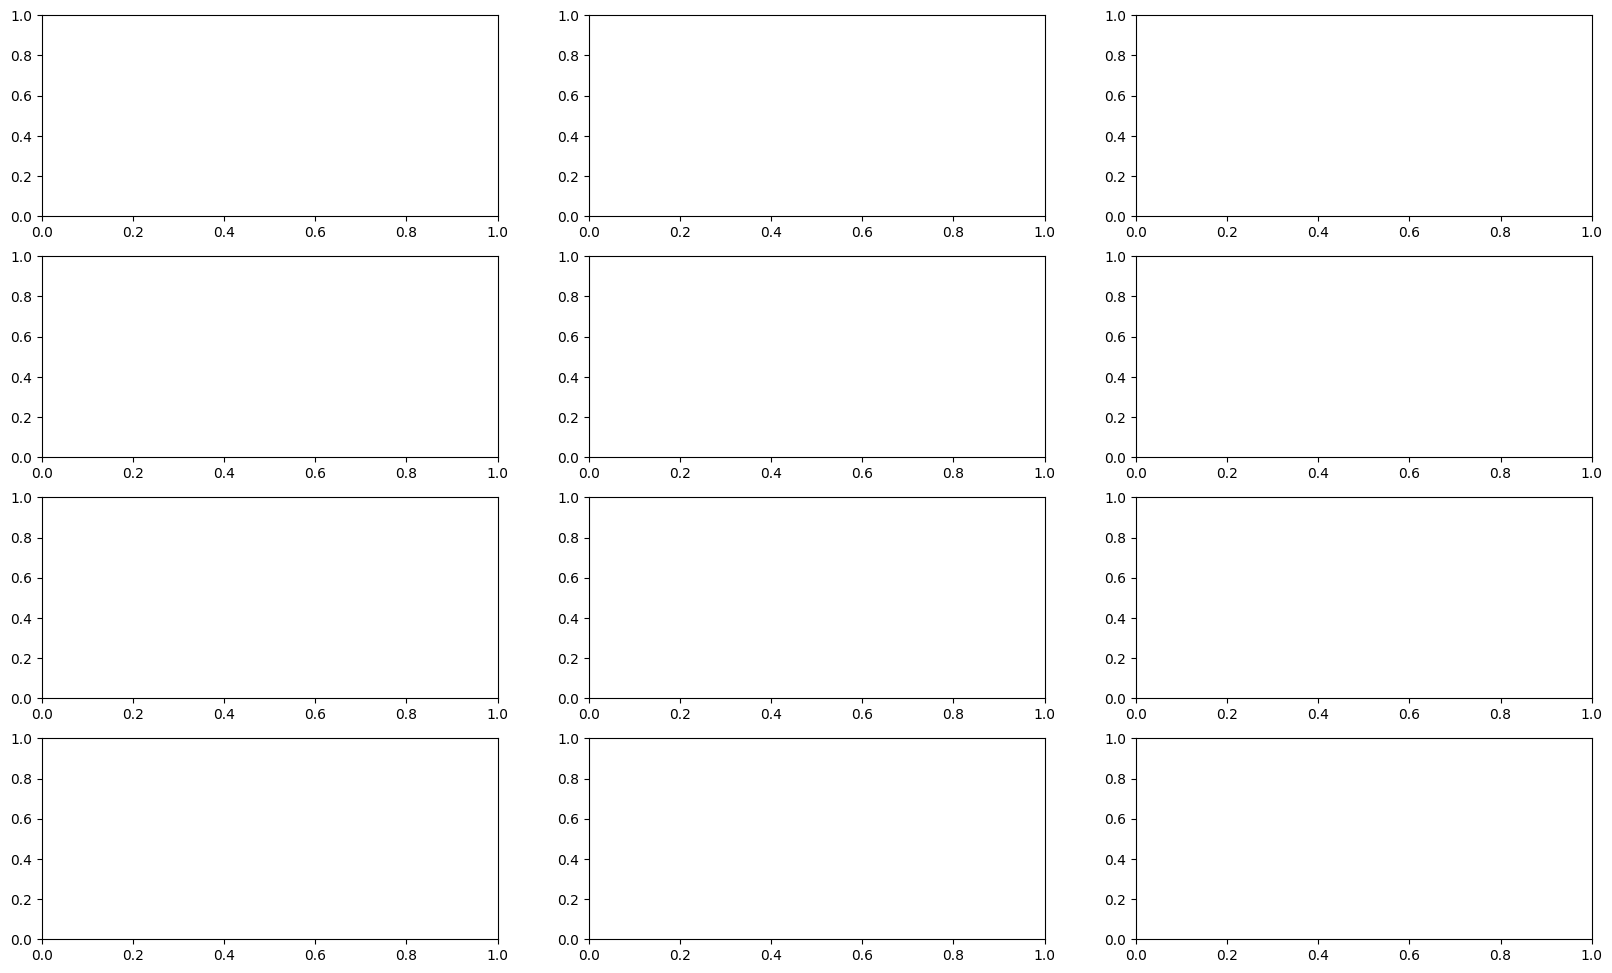

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'time' column is in datetime format
data_2020['time'] = pd.to_datetime(data_2020['time'], errors='coerce')
data_2020 = data_2020.dropna(subset=['time'])
data_2020 = data_2020[data_2020['time'].dt.year == 2020].reset_index(drop=True)

# Ensure y_test and y_pred are numpy arrays and have the same length as data_2020
y_test = np.array(y_test)[:len(data_2020)]
y_pred = np.array(y_pred)[:len(data_2020)]

# Extract unique months from the 'time' column
unique_months_2020 = data_2020['time'].dt.month.unique()

# Define the number of rows and columns for the subplot grid
n_cols = 3  # 3 columns
n_rows = 4  # 4 rows (since we have 12 months)

# Create separate plots for each month
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axs = axs.ravel()  # Flatten the axes array

# Loop over the months and create subplots
for i, month in enumerate(unique_months_2020):
    # Filter data_2020 for the specific month
    data_month = data_2020[data_2020['time'].dt.month == month]
    
    # Create a boolean mask based on filtered data_month
    mask = data_2020['time'].dt.month == month
    
    # Ensure mask length matches the length of y_test and y_pred
    if len(mask) != len(y_test):
        raise ValueError("Length of boolean mask does not match the length of y_test or y_pred")
    
    # Apply the boolean mask to y_test and y_pred
    y_test_month = y_test[mask]
    y_pred_month = y_pred[mask]
    
    # Plot the test temperature values (y_test) for all time steps in the month
    axs[i].plot(data_month['time'], y_test_month, label='Actual', color='blue', linestyle='-')
    
    # Plot the predicted temperature values (y_pred) for all time steps in the month
    axs[i].plot(data_month['time'], y_pred_month, label='Predicted', color='orange', linestyle='--')
    
    # Add scatter plot to mark the actual time steps as points
    axs[i].scatter(data_month['time'], y_test_month, color='blue', s=10)
    
    # Add scatter plot to mark the predicted time steps as points
    axs[i].scatter(data_month['time'], y_pred_month, color='orange', s=10)
    
    # Set title for each subplot
    axs[i].set_title(f'Month {month}')
    
    # Set x-axis limits to cover only the current month
    axs[i].set_xlim([data_month['time'].min(), data_month['time'].max()])
    
    # Set labels only for the edge plots
    if i % n_cols == 0:
        axs[i].set_ylabel('Temperature (K)')
    if i >= (n_cols * (n_rows - 1)):
        axs[i].set_xlabel('Time')
    
    # Add legend
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the entire grid of subplots
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1437 but corresponding boolean dimension is 1464

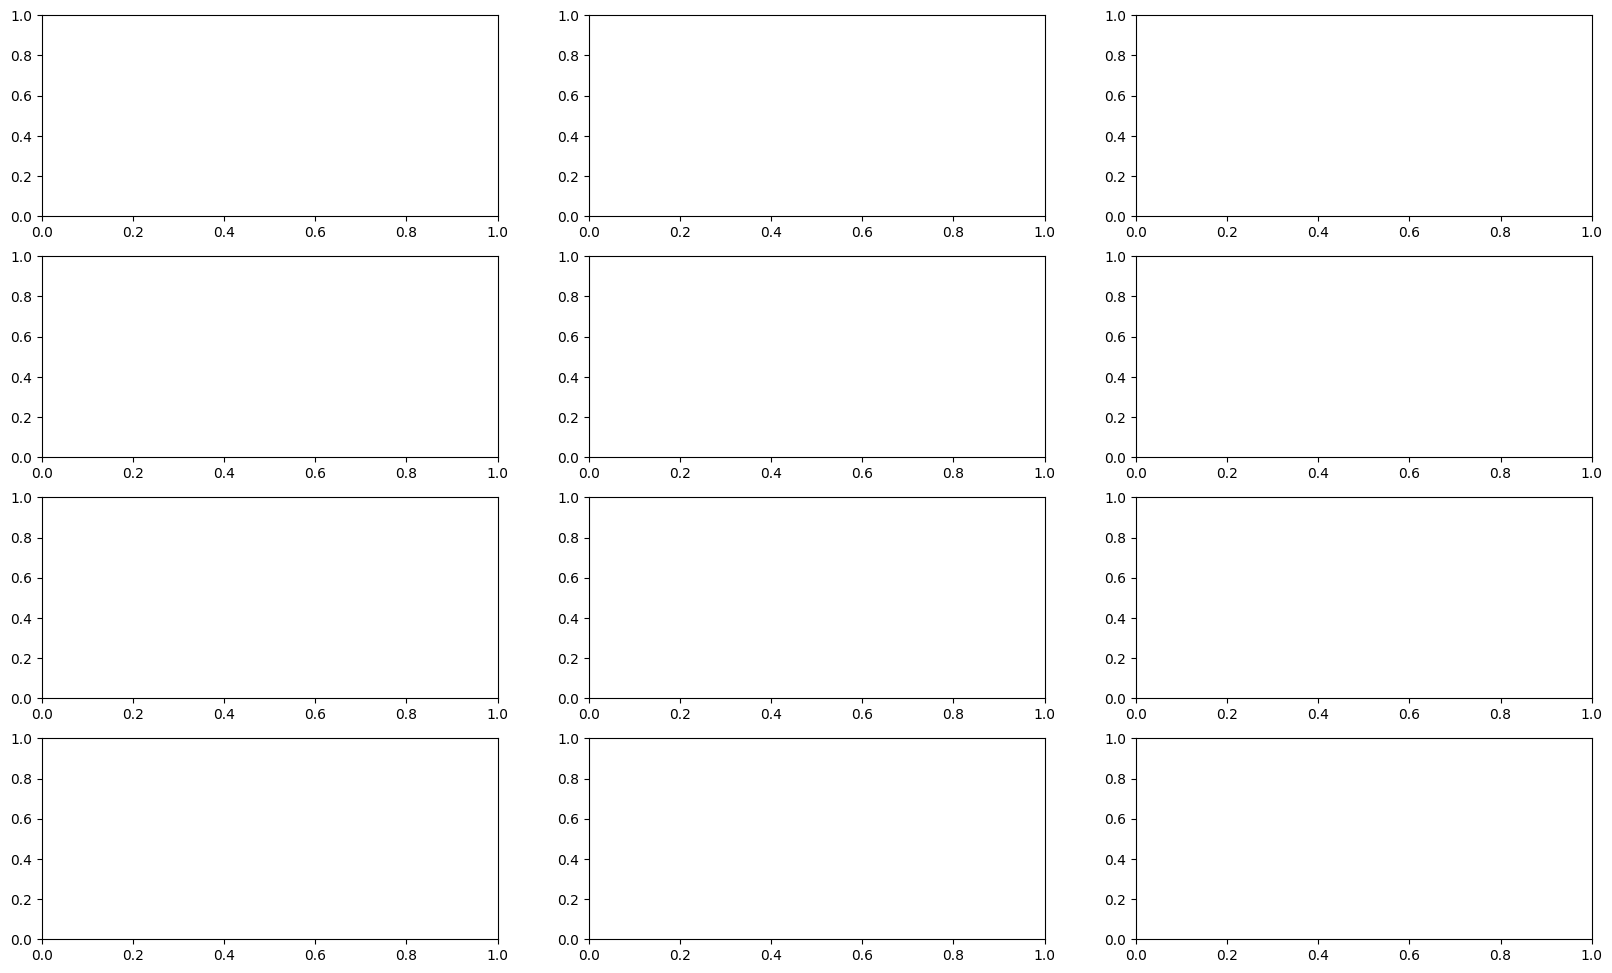

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data_2020 is already loaded and 'time' column is in datetime format

# Ensure y_test and y_pred are numpy arrays
y_test = np.array(y_test)  # Convert to numpy array if not already
y_pred = np.array(y_pred)  # Convert to numpy array if not already

# Filter data_2020 to year 2020 and reset index
data_2020['time'] = pd.to_datetime(data_2020['time'], errors='coerce')
data_2020 = data_2020.dropna(subset=['time'])
data_2020 = data_2020[data_2020['time'].dt.year == 2020].reset_index(drop=True)

# Ensure y_test and y_pred are sliced to match the length of data_2020
y_test = y_test[:len(data_2020)]
y_pred = y_pred[:len(data_2020)]

# Extract unique months from the 'time' column
unique_months_2020 = data_2020['time'].dt.month.unique()

# Define the number of rows and columns for the subplot grid
n_cols = 3  # 3 columns
n_rows = 4  # 4 rows (since we have 12 months)

# Create separate plots for each month
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axs = axs.ravel()  # Flatten the axes array

# Loop over the months and create subplots
for i, month in enumerate(unique_months_2020):
    # Filter data_2020 for the specific month
    data_month = data_2020[data_2020['time'].dt.month == month]
    
    # Create a boolean mask based on filtered data_month
    mask = data_2020.index.isin(data_month.index)
    
    # Apply the boolean mask to y_test and y_pred
    y_test_month = y_test[mask]
    y_pred_month = y_pred[mask]
    
    # Plot the test temperature values (y_test) for all time steps in the month
    axs[i].plot(data_month['time'], y_test_month, label='Actual', color='blue', linestyle='-')
    
    # Plot the predicted temperature values (y_pred) for all time steps in the month
    axs[i].plot(data_month['time'], y_pred_month, label='Predicted', color='orange', linestyle='--')
    
    # Add scatter plot to mark the actual time steps as points
    axs[i].scatter(data_month['time'], y_test_month, color='blue', s=10)
    
    # Add scatter plot to mark the predicted time steps as points
    axs[i].scatter(data_month['time'], y_pred_month, color='orange', s=10)
    
    # Set title for each subplot
    axs[i].set_title(f'Month {month}')
    
    # Set x-axis limits to cover only the current month
    axs[i].set_xlim([data_month['time'].min(), data_month['time'].max()])
    
    # Set labels only for the edge plots
    if i % n_cols == 0:
        axs[i].set_ylabel('Temperature (K)')
    if i >= (n_cols * (n_rows - 1)):
        axs[i].set_xlabel('Time')
    
    # Add legend
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the entire grid of subplots
plt.show()


#######
####### Create separate plots for each month and ensure that the full month is covered in each plot.
for month in unique_months_2020:
    # Filter data for the specific month
    data_month = data_2020[data_2020['time'].dt.month == month]
    
    # Create a figure for each month
    plt.figure(figsize=(12, 6))
    
    # Plot the temperature values for all time steps in the month
    plt.plot(data_month['time'], data_month['TMP_2m'], label=f'Temperature (Month {month})', color='orange')
    
    # Set labels and title
    plt.ylabel('Temperature (K)')
    plt.xlabel('Time')
    plt.title(f'Temperature in 2020 - Month {month}')
    
    # Show the plot
    plt.tight_layout()
    plt.grid(True)
    plt.show()